# Exploring Supervised Learning : Linear Regression

## Problem statement:

Predict the percentage of marks that a student is expected to score based upon the number of hours they studied.

### Importing the required libraries

In [1]:
import numpy as np                                          # for linear algebra 
import pandas as pd                                         # for using dataframes
import matplotlib.pyplot as plt                             # for visualising data
from sklearn.model_selection import train_test_split        # for splitting the data to train and test
from sklearn.linear_model import LinearRegression           # for performing regression
from sklearn import metrics                                 # for evaluating the model                                      

### Importing the dataset

In [2]:
data = pd.read_csv("http://bit.ly/w-data")       # importing csv from url   
data.head()                                      # to view a sample from the dataset

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Exploring the dataset

In [3]:
data.dtypes     # datatypes in the dataset

Hours     float64
Scores      int64
dtype: object

In [4]:
data.describe()     # an outline of various measures for the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
data.isnull().sum()    # to check for null values, if any

Hours     0
Scores    0
dtype: int64

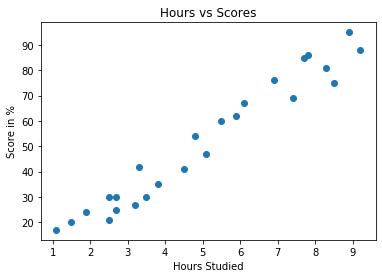

In [6]:
plt.scatter(data.Hours, data.Scores)    # plotting the data
plt.title('Hours vs Scores')            # title for plot
plt.xlabel('Hours Studied')             # label for x axis
plt.ylabel('Score in %')                # label for y axis
plt.show()                              # show the plot

### Split the dataset

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'].values.reshape(-1,1), test_size = 0.2)

### Training the dataset

In [8]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Plotting Regression Line 

Linear regression is characterised by two parameters, a and b, where a is the coefficient of the predictors and b is the intercept made on the y axis.

<h3><center>$$ y = aX + b $$</center></h3>


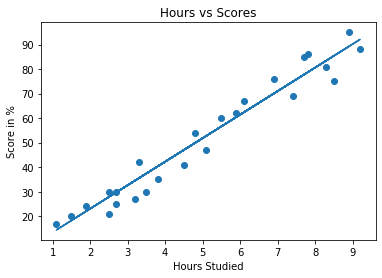

In [9]:
X = data['Hours'].values.reshape(-1,1)        # reshaping the predictor
y = data['Scores'].values.reshape(-1,1)       # reshaping the result (expected)
line = linreg.coef_*X + linreg.intercept_     # calculating regression line equation
plt.scatter(X, y)                             # plotting the data
plt.title('Hours vs Scores')                  # title for plot
plt.plot(X, line)                             # plotting regression line for whole data
plt.xlabel('Hours Studied')                   # label for x axis
plt.ylabel('Score in %')                      # label for y axis
plt.show()                                    # show the plot

### Predicting using the model

In [10]:
y_hat = linreg.predict(X_test)    # predicting for test set

### Evaluation of model

In [11]:
print('R-Squared Error:', linreg.score(X_test, y_test))                                 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_hat))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_hat))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

R-Squared Error: 0.9154213441882383
Mean Absolute Error: 5.317473352602034
Mean Squared Error: 31.984264481775778
Root Mean Squared Error: 5.655463242014378


### For example given

In [12]:
hour = np.array(9.25)             
hour = hour.reshape(-1,1)
print("For 9.25 hours,",linreg.predict(hour)[0][0])

For 9.25 hours, 92.57247939318867
